In [1]:
# Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Load the data
df = pd.read_csv('../input/imdb-5000-movies-multiple-genres-dataset/IMDb_All_Genres_etf_clean1.csv')

# View the data
df.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


### Data Understanding

In [2]:
# Basic information
df.shape

(5562, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


In [4]:
# Describe the data
df.describe()

,Year,Rating,Runtime(Mins)
count,5562.000000,5562.000000,5562.000000
mean,2002.792521,6.755861,112.226717
std,16.143990,0.937133,21.612655
min,1920.000000,1.000000,45.000000
25%,1997.000000,6.200000,97.000000
50%,2007.000000,6.800000,108.000000
75%,2014.000000,7.400000,123.000000
max,2022.000000,9.300000,321.000000


In [5]:
df.columns

Index(['Movie_Title', 'Year', 'Director', 'Actors', 'Rating', 'Runtime(Mins)',
       'Censor', 'Total_Gross', 'main_genre', 'side_genre'],
      dtype='object')

In [6]:
df.dtypes.value_counts()

object     7
int64      2
float64    1
dtype: int64

In [7]:
# Find the duplicates
df.duplicated().sum()

8

### Data Preparation

In [8]:
df.loc[df.duplicated()].head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
1572,Rush,2013,Ron Howard,"Daniel Brühl, Chris Hemsworth, Olivia Wilde, A...",8.1,123,R,$26.95M,Action,"Biography, Drama"
2567,Filth,2013,Jon S. Baird,"James McAvoy, Jamie Bell, Eddie Marsan, Imogen...",7.0,97,A,$0.03M,Action,"Comedy, Crime"
2675,The Heat,2013,Paul Feig,"Sandra Bullock, Michael McDonald, Melissa McCa...",6.6,117,A,$159.58M,Action,"Comedy, Crime"
2705,Homefront,2013,Gary Fleder,"Jason Statham, James Franco, Winona Ryder, Kat...",6.5,100,18,$20.16M,Action,"Crime, Thriller"
2780,Hummingbird,2013,Steven Knight,"Jason Statham, Agata Buzek, Vicky McClure, Ben...",6.2,100,A,$0.03M,Action,"Crime, Drama"


In [9]:
# There is duplicate entry
df.loc[df['Movie_Title'] == 'Rush']

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
59,Rush,2013,Ron Howard,"Daniel Brühl, Chris Hemsworth, Olivia Wilde, A...",8.1,123,R,$26.95M,Action,"Biography, Drama"
1572,Rush,2013,Ron Howard,"Daniel Brühl, Chris Hemsworth, Olivia Wilde, A...",8.1,123,R,$26.95M,Action,"Biography, Drama"


In [10]:
# Remove the duplicates
df = (
    df.loc[~df.duplicated()]
    .reset_index(drop=True)
    .copy()
)

In [11]:
df.shape

(5554, 10)

In [12]:
# There is no null values
df.isna().sum()

Movie_Title      0
Year             0
Director         0
Actors           0
Rating           0
Runtime(Mins)    0
Censor           0
Total_Gross      0
main_genre       0
side_genre       0
dtype: int64

### Feature Undertanding

In [13]:
df['Year'].unique()

array([2022, 2008, 2003, 2010, 2002, 2001, 1999, 1980, 1991, 1977, 1962,
       1954, 2019, 2000, 1994, 2018, 2012, 2021, 1997, 1986, 1981, 2017,
       2016, 1995, 1983, 1959, 2011, 2020, 2005, 1998, 1993, 1989, 1988,
       1985, 1961, 1926, 1924, 2015, 2013, 1984, 1982, 1975, 1958, 1949,
       2014, 2009, 2007, 2004, 2006, 1969, 1964, 1938, 1987, 1972, 1992,
       1973, 1971, 1967, 1960, 1948, 1932, 1996, 1979, 1974, 1968, 1990,
       1970, 1963, 1978, 1976, 1966, 1953, 1965, 1928, 1956, 1940, 1937,
       1951, 1955, 1950, 1942, 1941, 1925, 1952, 1939, 1957, 1944, 1931,
       1947, 1946, 1945, 1935, 1920, 1934, 1936, 1927, 1921, 1930, 1933])

In [14]:
df['Year'].value_counts()

2014    216
2013    202
2011    198
2016    197
2018    195
       ... 
1936      1
1924      1
1921      1
1930      1
1933      1
Name: Year, Length: 99, dtype: int64

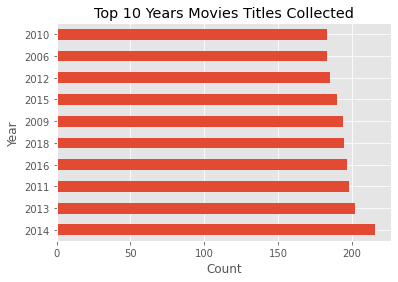

In [15]:
ax = (
    df['Year']
    .value_counts()
    .head(10)
    .plot(kind='barh', title='Top 10 Years Movies Titles Collected')
)
ax.set_xlabel('Count')
ax.set_ylabel('Year')
plt.show()

In [16]:
df['main_genre'].unique()

array(['Action', 'Animation', 'Biography', 'Adventure', 'Western',
       'Drama', 'Crime', 'Comedy', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Musical'], dtype=object)

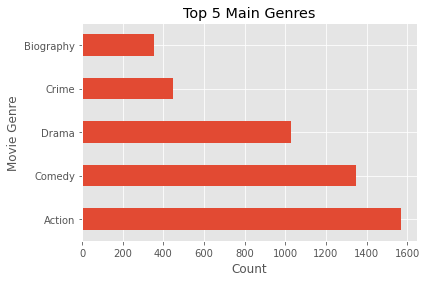

In [17]:
ax = (
    df['main_genre']
    .value_counts()
    .head()
    .plot(kind='barh', title='Top 5 Main Genres')
)
ax.set_xlabel('Count')
ax.set_ylabel('Movie Genre')
plt.show()

In [18]:
df['side_genre'].unique()

array([' Adventure,  Drama', ' Crime,  Drama', ' Adventure,  Sci-Fi',
       ' Sci-Fi', ' Adventure,  Fantasy', ' Drama,  Mystery', ' Drama',
       ' Adventure,  Crime', ' Thriller', ' Action,  Adventure',
       ' Biography,  Drama', ' Adventure', ' Adventure,  Mystery',
       ' Drama,  War', ' Drama,  History', ' Comedy,  Crime',
       ' Biography,  Crime', ' Drama,  Sport', ' Drama,  Sci-Fi',
       ' Drama,  Thriller', ' Adventure,  Comedy', ' Comedy,  Romance',
       ' Drama,  Romance', ' Mystery,  Thriller', ' Adventure,  Thriller',
       ' Crime,  Thriller', ' Action,  Drama', ' Sci-Fi,  Thriller',
       ' Crime,  Comedy', ' Action,  Crime', ' Adventure,  Western',
       ' Drama,  Western', ' Adventure,  Romance',
       ' Adventure,  Biography', ' Comedy,  Mystery',
       ' Adventure,  Horror', ' Comedy,  Fantasy', ' Crime,  Mystery',
       ' Adventure,  War', ' Horror,  Thriller', ' Comedy,  Horror',
       ' Adventure,  Family', ' Crime,  Sci-Fi', ' Comedy,  Drama',


In [19]:
df['Director'].nunique()

2320

In [20]:
df['Censor'].unique()

array(['UA', 'U', 'A', 'Not Rated', 'R', '18', 'UA 16+', 'PG', 'PG-13',
       'U/A', '7', '16', '(Banned)', '13', '12+', 'UA 13+', '15+', '12',
       'All', 'Unrated', 'G', 'UA 7+', 'M/PG', '18+', 'NC-17'],
      dtype=object)

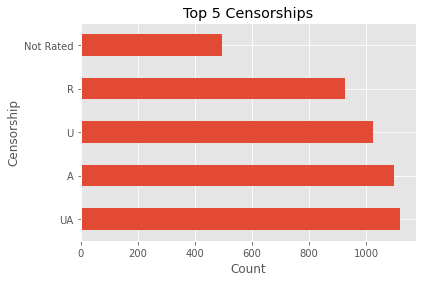

In [21]:
ax = (
    df['Censor']
    .value_counts()
    .head()
    .plot(kind='barh', title='Top 5 Censorships')
)
ax.set_ylabel('Censorship')
ax.set_xlabel('Count')
plt.show()

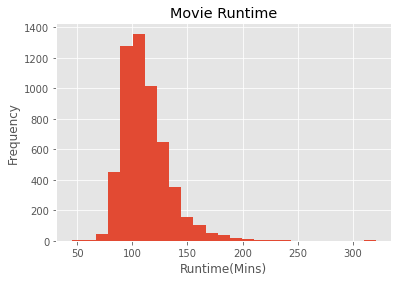

In [22]:
ax = (
    df['Runtime(Mins)'].plot(kind='hist',
                             title='Movie Runtime',
                             bins=25)
)
ax.set_xlabel('Runtime(Mins)')
plt.show()

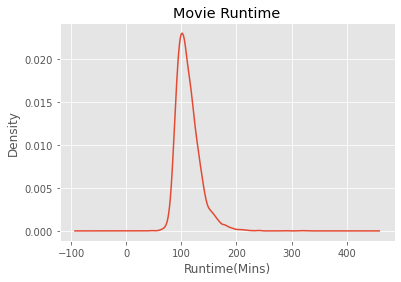

In [23]:
ax = (
    df['Runtime(Mins)'].plot(kind='kde',
                             title='Movie Runtime')
)
ax.set_xlabel('Runtime(Mins)')
plt.show()

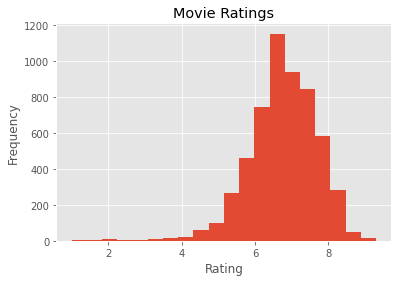

In [24]:
ax = (
    df['Rating'].plot(kind='hist',
                      title='Movie Ratings',
                      bins=20)
)
ax.set_xlabel('Rating')
plt.show()

### Feature Relationships

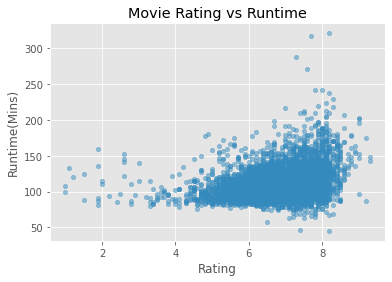

In [25]:
df.plot(kind='scatter',
       x='Rating',
       y='Runtime(Mins)',
       title='Movie Rating vs Runtime',
       alpha=0.5)
plt.show()

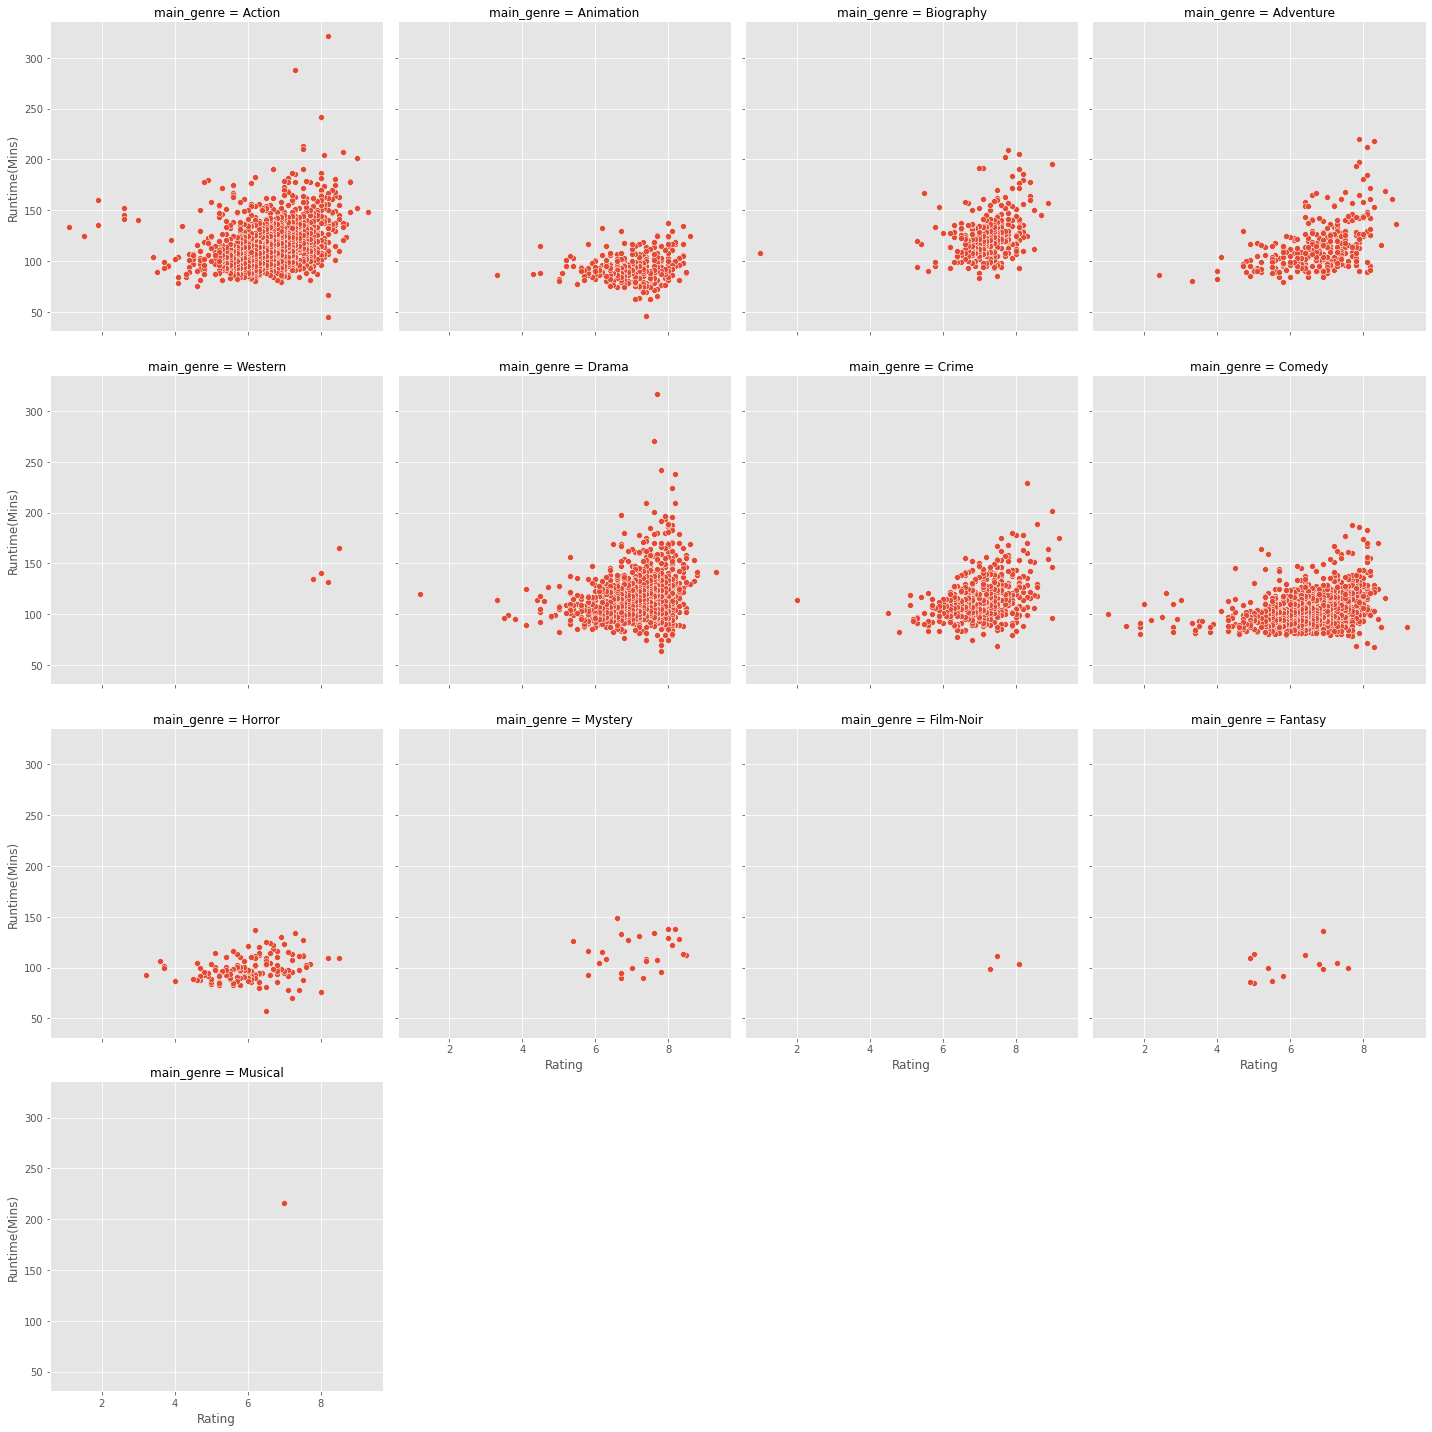

In [26]:
sns.relplot(
    data=df,
    kind='scatter',
    x='Rating',
    y='Runtime(Mins)',
    col='main_genre',
    col_wrap=4
)
plt.show()

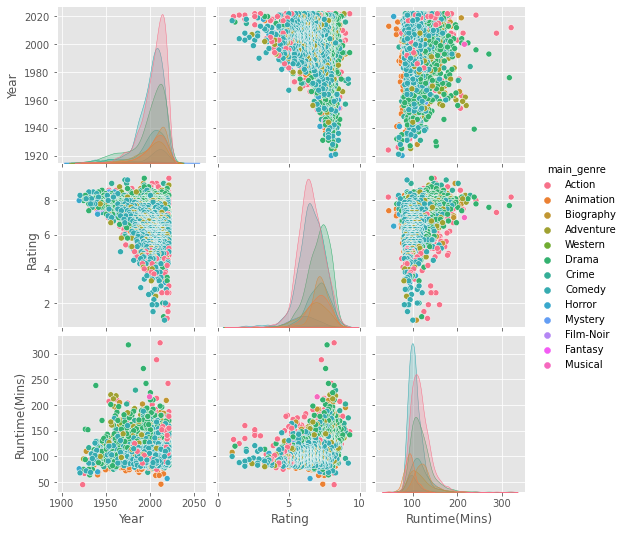

In [27]:
sns.pairplot(
    df,
    vars=['Year', 'Rating', 'Runtime(Mins)'],
    hue='main_genre'
)
plt.show()

In [28]:
df_corr = (
    df[['Year', 'Rating', 'Runtime(Mins)']]
    .corr()
)
df_corr

,Year,Rating,Runtime(Mins)
Year,1.000000,-0.291806,0.023240
Rating,-0.291806,1.000000,0.323101
Runtime(Mins),0.023240,0.323101,1.000000


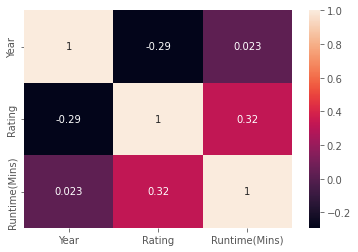

In [29]:
sns.heatmap(df_corr, annot=True)
plt.show()

### Ask a question about the dataset
- What the movies' main genres with best ratings?
 - Consider movies with more than 100 scores.

In [30]:
(
    df.groupby('main_genre')['Rating']
    .agg(['mean', 'count'])
    .query('count > 100')
    .sort_values(by='mean')
)

,mean,count
main_genre,,
Horror,6.045775,142
Action,6.528936,1569
Comedy,6.543037,1350
Adventure,6.741216,296
Animation,7.030218,321
Crime,7.081655,447
Drama,7.084907,1027
Biography,7.229577,355


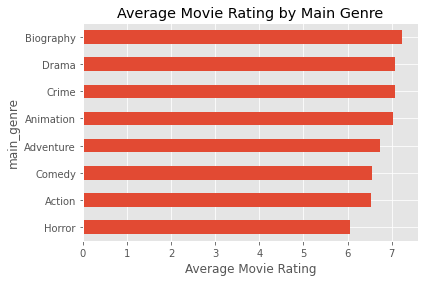

In [31]:
ax = (
    df.groupby('main_genre')['Rating']
    .agg(['mean', 'count'])
    .query('count > 100')
    .sort_values(by='mean')['mean']
    .plot(kind='barh', title='Average Movie Rating by Main Genre')
)
ax.set_xlabel('Average Movie Rating')
plt.show()